In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\Usuario\Ciencia de datos\MLPython\python-ml-course-master\datasets\titanic\titanic3.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data.shape

(1309, 14)

In [6]:
cols=data.columns
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
data.describe(include=[ "O"])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


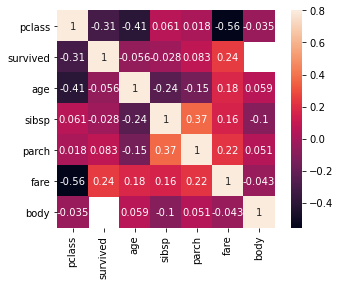

In [19]:
corrmat= data.corr()
sns.heatmap(corrmat, vmax= 0.8, square=True, annot=True)

<BarContainer object of 3 artists>

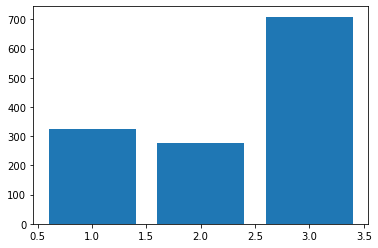

In [21]:
pyc=pd.DataFrame(data["pclass"].value_counts())
plt.bar(pyc.index,pyc["pclass"])

C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Edad')

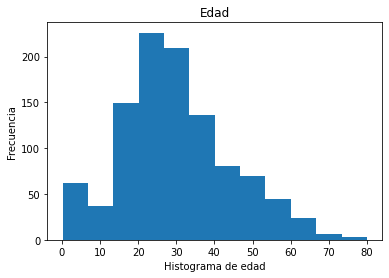

In [23]:
k=int(np.ceil(1+ np.log2(len(data))))
plt.hist(data["age"], bins =k)
plt.xlabel("Histograma de edad")
plt.ylabel("Frecuencia")
plt.title("Edad")

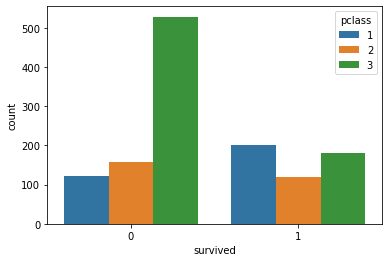

In [49]:
sns.countplot(x="survived", hue="pclass",data=data)

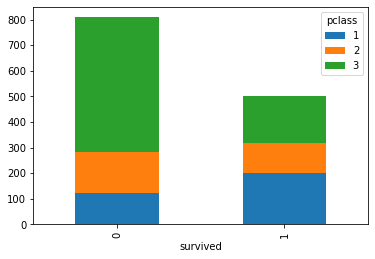

In [52]:
df_plot = data.groupby(['pclass', 'survived']).size().reset_index().pivot(columns='pclass', index='survived', values=0)
df_plot.plot(kind='bar', stacked=True)

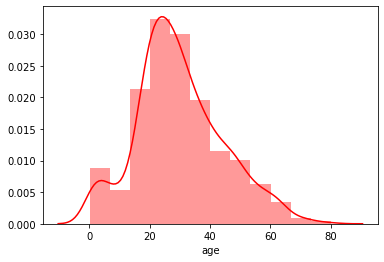

In [37]:
sns.distplot(data["age"], bins= k, color= "red", kde=True)

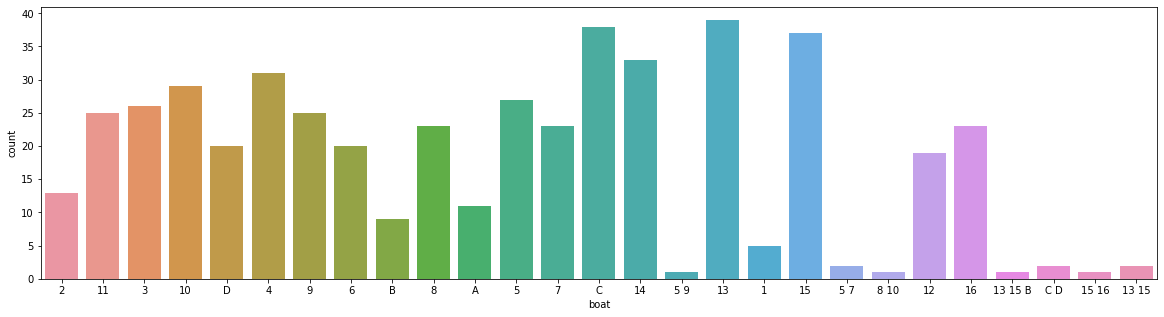

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(x="boat" ,data=data)

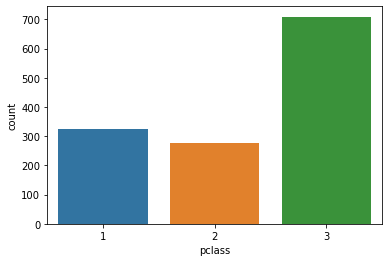

In [48]:
sns.countplot(x="pclass", data=data)

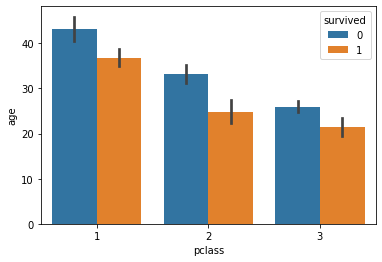

In [52]:
sns.barplot(x ="pclass", y="age", hue="survived", data=data)

([<matplotlib.patches.Wedge at 0x29f224d8d90>,
 [Text(-0.1434698270862726, 1.0906036900340266, '3'),
  Text(-0.5598772584173519, -0.9468566182411515, '1'),
  Text(0.8657453302509909, -0.678590467917582, '2')])

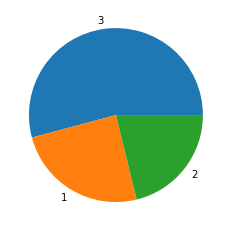

In [40]:
clase= pd.DataFrame(data["pclass"].value_counts())
plt.pie((clase["pclass"]), labels=clase.index)

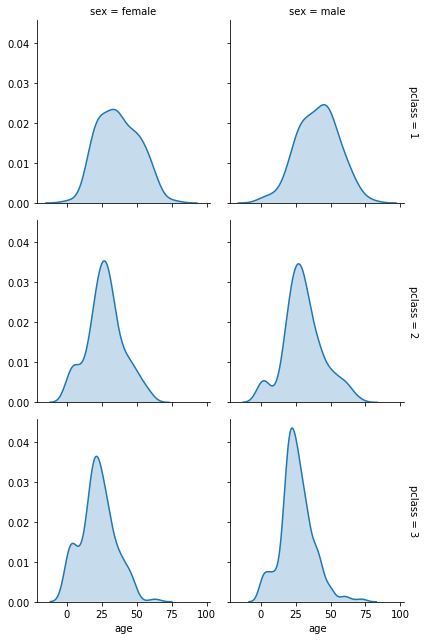

In [10]:
g = sns.FacetGrid(data, col="sex", row="pclass", margin_titles=True)
g.map(sns.kdeplot, 'age', shade=True)

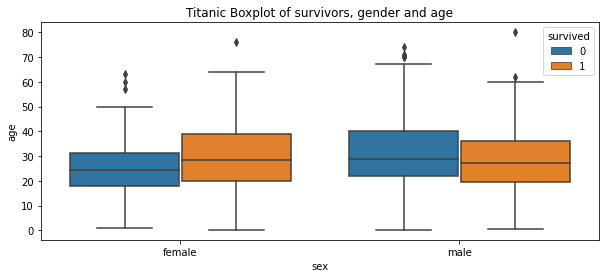

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(x='sex',y='age',hue='survived',data=data)
plt.title('Titanic Boxplot of survivors, gender and age')
plt.show()

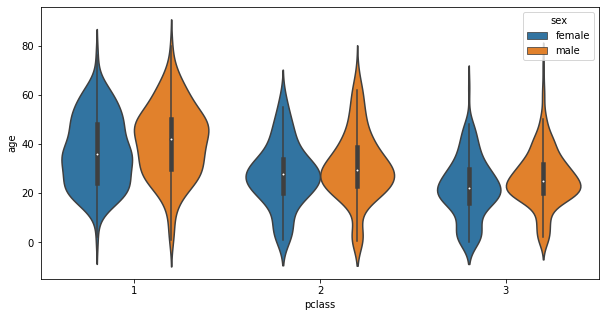

In [39]:
plt.figure(figsize=(10,5))
sns.violinplot(x ="pclass", y="age", hue="sex", data=data)
